# DataGeometry Objects (Geos)

The DataGeometry object is the hypertools data object class.

A DataGeometry object contains the data, figure handles, and transform functions used to create a plot. Note that this class should not be called directly, but is used by the hyp.plot function to create a plot object.

In this tutorial we will explore the features of a geo and how it may be used.

## Import Hypertools

In [20]:
import hypertools as hyp

## Load your data

In this case, we have used one of the sample datasets built into the package.

In [21]:
mushrooms = hyp.load('mushrooms')

We can peek at the first few rows of the dataframe using the pandas feature 'head(n)'

In [22]:
mushrooms.head(n=5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## Plot data

First, we will plot the data, generating a geo.

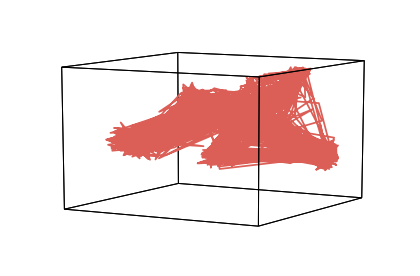

In [23]:
geo = hyp.plot(mushrooms)

## Exploring the geo

### Hypertools Version

The version field contains the version number of hypertools that the geo was generated with.

In [24]:
geo.version

'0.4.0'

### Data and plot

The data field contains the raw data and the fig field contains the figure itself

In [25]:
geo.data

[array([[0, 1, 0, ..., 0, 1, 0],
        [1, 0, 0, ..., 0, 0, 0],
        [1, 0, 1, ..., 0, 0, 0],
        ..., 
        [1, 0, 0, ..., 0, 0, 0],
        [0, 1, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0]], dtype=uint8)]

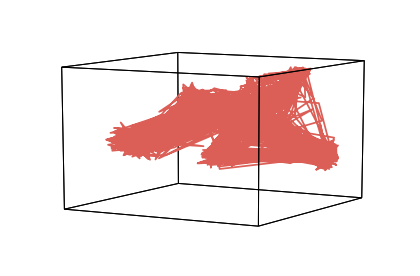

In [26]:
geo.fig

### Transformed data and metadata

The xform_data field contains the transformed data (in this case, the data was automatically reduced to 3 dimensions for plotting when we called hyp.plot) and the reduce field contains the information about how the reduction was implemented (the model and its parameters).

In [27]:
geo.xform_data

[array([[ 0.66282511, -0.50030606,  1.60971357],
        [ 1.5395065 , -0.25964717,  1.89064114],
        [ 1.69285148, -0.2652148 ,  1.89496073],
        ..., 
        [ 0.68330896, -0.29900591,  0.38257187],
        [-1.47676276, -1.45182833, -0.16606786],
        [ 0.66276601, -0.3111866 ,  0.60080039]])]

In [28]:
geo.reduce

{'model': 'IncrementalPCA', 'params': {'n_components': 3}}

### Align and normalize metadata

The align and normalize fields contain information about the data aligment (model and parameters) and normalization, respectively.

In this case the normalization is none and the alignment parameter fields are empty, as no alignment was used.

In [29]:
geo.align

{'model': None, 'params': {}}

In [30]:
geo.normalize

### Plotting axes and animations

The ax and line_ani fields hold the plot axes and the animation setting (in this case None) for plotting, respectively.

In [31]:
geo.ax

In [32]:
geo.line_ani

## Plotting with geos

You can also generate a new plot (a new geo) from data stored in the geo using geo.plot.

This plotting feature accepts all of the keyword arguments supported by hypertools.plot.

First, let's plot without making any changes.

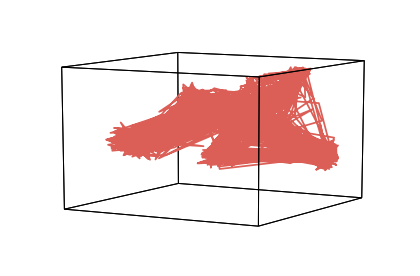

In [33]:
geo.plot()

Now, let's change the plot using some keyword arguments.

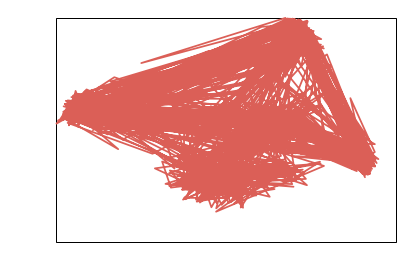

In [36]:
geo.plot(ndims = 2)

## Tranforming data using geos

An additional feature afforded by geos is the ability to later analyze other datasets using the same transformations performed on the original data in the geo.

This allows for easy comparison of multiple datasets.

Here, we load a built in dataset (the weights dataset) and apply the transform from the geo data to the first element of weights.

In [45]:
weights = hyp.load('weights')

In [46]:
geo.transform(weights[0])

array([[  1.02261314e+01,  -4.45879507e+00,   3.81942225e+00],
       [  2.31492662e+00,  -2.88961315e+00,   4.30638170e+00],
       [ -1.35657251e+00,  -1.98363090e+00,   3.39639783e+00],
       [ -2.00143099e+00,  -1.06062758e+00,   1.76022530e+00],
       [ -2.19376028e-01,  -3.10257167e-01,   1.24557889e+00],
       [ -1.62174273e+00,   1.19219959e+00,   1.70820904e+00],
       [ -3.51259398e+00,   1.04469967e+00,   2.40999174e+00],
       [ -6.56649590e+00,   9.45530295e-01,   1.48740828e+00],
       [ -6.40598583e+00,   1.66641504e-01,   2.29102731e+00],
       [ -6.42893505e+00,   6.72294021e-01,   3.24273729e+00],
       [ -5.29658937e+00,   1.52558112e+00,   4.33913422e+00],
       [ -5.51353073e+00,   1.75708735e+00,   4.87600708e+00],
       [ -3.78208351e+00,   1.54938376e+00,   3.84093046e+00],
       [ -2.06615353e+00,  -1.03462374e+00,   2.41351318e+00],
       [  1.08894753e+00,  -2.54567051e+00,   1.27036452e+00],
       [  2.71206474e+00,  -2.07493734e+00,  -2.7366399

## Saving geos

You can also easily save a geo using geo.save. The geo will save as a 'geo' file, which is a dictionary containing the elements of a data geometry object saved in the hd5 format using deepdish.

In [50]:
geo.save('MyGeoFile')

To specify the compression type, pass a string to the compression argument, as below.

See the deepdish documentation for the full list of compression options: http://deepdish.readthedocs.io/en/latest/api_io.html#deepdish.io.save

In [52]:
geo.save('MyGeoFile', compression = 'blosc')